Program took 2.92s to run
b value that minimizes the difference between average age: 0.471
b value that minimizes the overall average age: 0.312


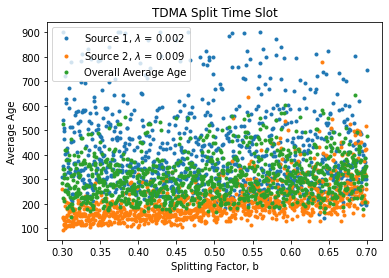

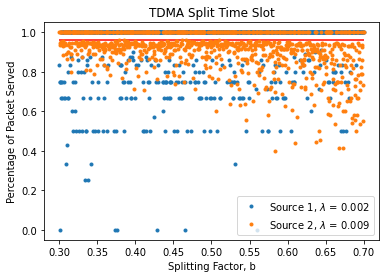

FileNotFoundError: [Errno 2] No such file or directory: '.\\Plots\\TDMA\\percentage_done_u1l_0.pickle'

In [44]:
from TDMAQueue import TDMAQueue
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pl

if __name__ == "__main__":
    # Set simulation step size and duration (seconds)
    tFinal = 1800
    dt = 0.1

    # Set number of sources
    numSources = 2

    # Set average service rate (packet/second)
    mu = 1/30
    T = 5/mu

    # Set splitting factor b
    bLength = 1000
    splitFactor = np.linspace(0.3, 0.7, bLength)

    # Set arrival rates for each source (packet/second)
    arrivalRate = [0, 0]
    # Need to make sure that the arrival rate will always be less than the service rate
    arrivalRate[0] = mu * min(splitFactor) * 0.2
    arrivalRate[1] = mu * (1 - max(splitFactor)) * 0.9

    numSimulations = 1
    avgAge = np.zeros((bLength, numSources,))
    avgJobComp = np.zeros((bLength, numSources,))

    start_time = time.time()

    for i in range(bLength):
        b = splitFactor[i]
        slotWidth = [b*T, (1-b)*T]

        for j in range(numSimulations):
            print("[{:d}/{:d}] Simulation {:d} for b={:.2f}".format(
                i, bLength, j, b), end='\r')

            tdma = TDMAQueue(tFinal, dt, slotWidth, arrivalRate, mu)
            avgAge[i] += tdma.getAvgAge()
            avgJobComp[i] += tdma.CompletionPercentage()

        avgAge[i] = avgAge[i] / numSimulations
        avgJobComp[i] = avgJobComp[i] / numSimulations
        # print("b = {:.2f}, avgJobComp = [ {:.2f}, {:.2f} ]".format(
        #     b, avgJobComp[i, 0], avgJobComp[i, 1]), end='\n');

    print("Program took {:.2f}s to run".format(time.time() - start_time))

    diffAge = abs(avgAge[:, 0] - avgAge[:, 1])
    bestB = splitFactor[np.argmin(diffAge)]
    print(
        "b value that minimizes the difference between average age: {:.3f}".format(bestB))

    overallAvgAge = np.sum(avgAge, axis=1) / numSources
    bestB = splitFactor[np.argmin(overallAvgAge)]
    print(
        "b value that minimizes the overall average age: {:.3f}".format(bestB))

    plt.figure(1)
    plt.plot(splitFactor, avgAge[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgAge[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.plot(splitFactor, overallAvgAge, '.', label="Overall Average Age")
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Average Age")
    plt.title("TDMA Split Time Slot")
    plt.show()
    
    T1 = 0
    fig_handle = plt.figure(2)
    filename = 'percentage_done_u1l_%s' % T1
    plt.plot(splitFactor, avgJobComp[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgJobComp[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.hlines(y=0.96, xmin=min(splitFactor), xmax=max(splitFactor), color='r')
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Percentage of Packet Served")
    plt.title("TDMA Split Time Slot")
    plt.show()
    pl.dump(fig_handle,open('.\Plots\TDMA\%s.pickle' % filename,'wb'))


Program took 313.19s to run
b value that minimizes the difference between average age: 0.700
b value that minimizes the overall average age: 0.405


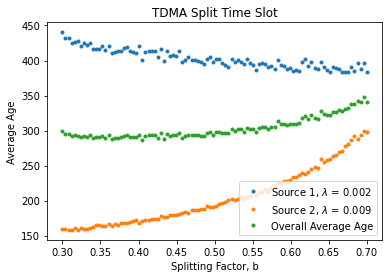

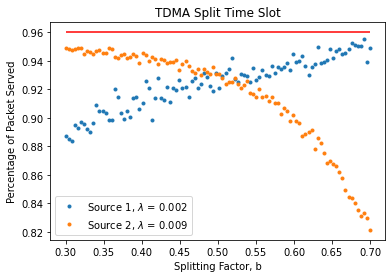

In [45]:
from TDMAQueue import TDMAQueue
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pl

if __name__ == "__main__":
    # Set simulation step size and duration (seconds)
    tFinal = 1800
    dt = 0.1

    # Set number of sources
    numSources = 2

    # Set average service rate (packet/second)
    mu = 1/30
    T = 5/mu

    # Set splitting factor b
    bLength = 100
    splitFactor = np.linspace(0.3, 0.7, bLength)

    # Set arrival rates for each source (packet/second)
    arrivalRate = [0, 0]
    # Need to make sure that the arrival rate will always be less than the service rate
    arrivalRate[0] = mu * min(splitFactor) * 0.2
    arrivalRate[1] = mu * (1 - max(splitFactor)) * 0.9

    numSimulations = 1000
    avgAge = np.zeros((bLength, numSources,))
    avgJobComp = np.zeros((bLength, numSources,))

    start_time = time.time()

    for i in range(bLength):
        b = splitFactor[i]
        slotWidth = [b*T, (1-b)*T]

        for j in range(numSimulations):
            print("[{:d}/{:d}] Simulation {:d} for b={:.2f}".format(
                i, bLength, j, b), end='\r')

            tdma = TDMAQueue(tFinal, dt, slotWidth, arrivalRate, mu)
            avgAge[i] += tdma.getAvgAge()
            avgJobComp[i] += tdma.CompletionPercentage()

        avgAge[i] = avgAge[i] / numSimulations
        avgJobComp[i] = avgJobComp[i] / numSimulations
        # print("b = {:.2f}, avgJobComp = [ {:.2f}, {:.2f} ]".format(
        #     b, avgJobComp[i, 0], avgJobComp[i, 1]), end='\n');

    print("Program took {:.2f}s to run".format(time.time() - start_time))

    diffAge = abs(avgAge[:, 0] - avgAge[:, 1])
    bestB = splitFactor[np.argmin(diffAge)]
    print(
        "b value that minimizes the difference between average age: {:.3f}".format(bestB))

    overallAvgAge = np.sum(avgAge, axis=1) / numSources
    bestB = splitFactor[np.argmin(overallAvgAge)]
    print(
        "b value that minimizes the overall average age: {:.3f}".format(bestB))

    plt.figure(1)
    plt.plot(splitFactor, avgAge[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgAge[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.plot(splitFactor, overallAvgAge, '.', label="Overall Average Age")
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Average Age")
    plt.title("TDMA Split Time Slot")
    plt.show()
    
    T1 = 0
    fig_handle = plt.figure(2)
    filename = 'percentage_done_u1l_%s' % T1
    plt.plot(splitFactor, avgJobComp[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgJobComp[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.hlines(y=0.96, xmin=min(splitFactor), xmax=max(splitFactor), color='r')
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Percentage of Packet Served")
    plt.title("TDMA Split Time Slot")
    plt.show()
    pl.dump(fig_handle,open('.\Plots\TDMA\%s.pickle' % filename,'wb'))


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl

# Load figure from disk and display
fig_handle = pl.load(open('.\Plots\TDMA\percentage_done_u1l_0.pickle','rb'))
fig_handle.show()


AttributeError: Figure.show works only for figures managed by pyplot, normally created by pyplot.figure()

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl

# Load figure from disk and display
fig_handle = pl.load(open('.\Plots\TDMA\percentage_done_u1l_0.pickle','rb'))
plt.show()


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl

# Load figure from disk and display
fig_handle = pl.load(open('.\Plots\TDMA\percentage_done_u1l_0.pickle','rb'))
plt.show()


In [49]:
from TDMAQueue import TDMAQueue
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pl
import seaborn as sns 

if __name__ == "__main__":
    # Set simulation step size and duration (seconds)
    tFinal = 1800
    dt = 0.1

    # Set number of sources
    numSources = 2

    # Set average service rate (packet/second)
    mu = 1/30
    T = 5/mu

    # Set splitting factor b
    bLength = 100
    splitFactor = np.linspace(0.3, 0.7, bLength)

    # Set arrival rates for each source (packet/second)
    arrivalRate = [0, 0]
    # Need to make sure that the arrival rate will always be less than the service rate
    arrivalRate[0] = mu * min(splitFactor) * 0.4
    arrivalRate[1] = mu * (1 - max(splitFactor)) * 0.9

    numSimulations = 500
    avgAge = np.zeros((bLength, numSources,))
    avgJobComp = np.zeros((bLength, numSources,))

    start_time = time.time()

    for i in range(bLength):
        b = splitFactor[i]
        slotWidth = [b*T, (1-b)*T]

        for j in range(numSimulations):
            print("[{:d}/{:d}] Simulation {:d} for b={:.2f}".format(
                i, bLength, j, b), end='\r')

            tdma = TDMAQueue(tFinal, dt, slotWidth, arrivalRate, mu)
            avgAge[i] += tdma.getAvgAge()
            avgJobComp[i] += tdma.CompletionPercentage()

        avgAge[i] = avgAge[i] / numSimulations
        avgJobComp[i] = avgJobComp[i] / numSimulations
        # print("b = {:.2f}, avgJobComp = [ {:.2f}, {:.2f} ]".format(
        #     b, avgJobComp[i, 0], avgJobComp[i, 1]), end='\n');

    print("Program took {:.2f}s to run".format(time.time() - start_time))

    diffAge = abs(avgAge[:, 0] - avgAge[:, 1])
    bestB = splitFactor[np.argmin(diffAge)]
    print(
        "b value that minimizes the difference between average age: {:.3f}".format(bestB))

    overallAvgAge = np.sum(avgAge, axis=1) / numSources
    bestB = splitFactor[np.argmin(overallAvgAge)]
    print(
        "b value that minimizes the overall average age: {:.3f}".format(bestB))

    plt.figure(1)
    plt.plot(splitFactor, avgAge[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgAge[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.plot(splitFactor, overallAvgAge, '.', label="Overall Average Age")
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Average Age")
    plt.title("TDMA Split Time Slot")
    plt.show()
    
    filename = 'percentage_done_u1l_%s' % T1
    plt.plot(splitFactor, avgJobComp[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgJobComp[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.hlines(y=0.96, xmin=min(splitFactor), xmax=max(splitFactor), color='r')
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Percentage of Packet Served")
    plt.title("TDMA Split Time Slot")
    plt.show()


ModuleNotFoundError: No module named 'seaborn'

Program took 156.08s to run
b value that minimizes the difference between average age: 0.635
b value that minimizes the overall average age: 0.506


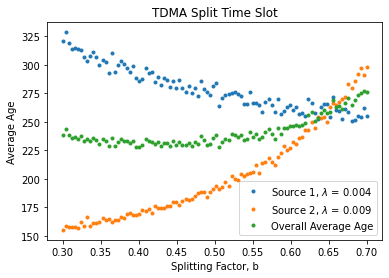

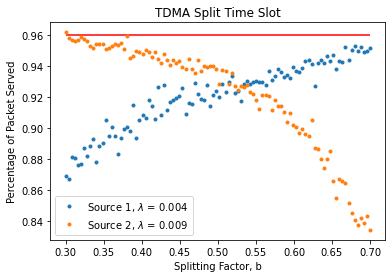

In [50]:
from TDMAQueue import TDMAQueue
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pl

if __name__ == "__main__":
    # Set simulation step size and duration (seconds)
    tFinal = 1800
    dt = 0.1

    # Set number of sources
    numSources = 2

    # Set average service rate (packet/second)
    mu = 1/30
    T = 5/mu

    # Set splitting factor b
    bLength = 100
    splitFactor = np.linspace(0.3, 0.7, bLength)

    # Set arrival rates for each source (packet/second)
    arrivalRate = [0, 0]
    # Need to make sure that the arrival rate will always be less than the service rate
    arrivalRate[0] = mu * min(splitFactor) * 0.4
    arrivalRate[1] = mu * (1 - max(splitFactor)) * 0.9

    numSimulations = 500
    avgAge = np.zeros((bLength, numSources,))
    avgJobComp = np.zeros((bLength, numSources,))

    start_time = time.time()

    for i in range(bLength):
        b = splitFactor[i]
        slotWidth = [b*T, (1-b)*T]

        for j in range(numSimulations):
            print("[{:d}/{:d}] Simulation {:d} for b={:.2f}".format(
                i, bLength, j, b), end='\r')

            tdma = TDMAQueue(tFinal, dt, slotWidth, arrivalRate, mu)
            avgAge[i] += tdma.getAvgAge()
            avgJobComp[i] += tdma.CompletionPercentage()

        avgAge[i] = avgAge[i] / numSimulations
        avgJobComp[i] = avgJobComp[i] / numSimulations
        # print("b = {:.2f}, avgJobComp = [ {:.2f}, {:.2f} ]".format(
        #     b, avgJobComp[i, 0], avgJobComp[i, 1]), end='\n');

    print("Program took {:.2f}s to run".format(time.time() - start_time))

    diffAge = abs(avgAge[:, 0] - avgAge[:, 1])
    bestB = splitFactor[np.argmin(diffAge)]
    print(
        "b value that minimizes the difference between average age: {:.3f}".format(bestB))

    overallAvgAge = np.sum(avgAge, axis=1) / numSources
    bestB = splitFactor[np.argmin(overallAvgAge)]
    print(
        "b value that minimizes the overall average age: {:.3f}".format(bestB))

    plt.figure(1)
    plt.plot(splitFactor, avgAge[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgAge[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.plot(splitFactor, overallAvgAge, '.', label="Overall Average Age")
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Average Age")
    plt.title("TDMA Split Time Slot")
    plt.show()
    
    filename = 'percentage_done_u1l_%s' % T1
    plt.plot(splitFactor, avgJobComp[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgJobComp[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.hlines(y=0.96, xmin=min(splitFactor), xmax=max(splitFactor), color='r')
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Percentage of Packet Served")
    plt.title("TDMA Split Time Slot")
    plt.show()


Program took 167.00s to run
b value that minimizes the difference between average age: 0.567
b value that minimizes the overall average age: 0.437


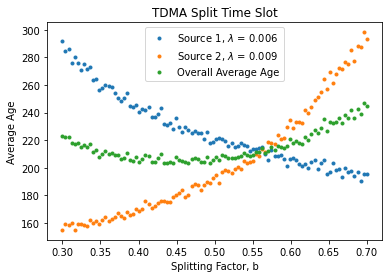

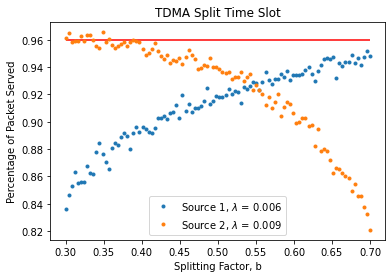

In [51]:
from TDMAQueue import TDMAQueue
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pl

if __name__ == "__main__":
    # Set simulation step size and duration (seconds)
    tFinal = 1800
    dt = 0.1

    # Set number of sources
    numSources = 2

    # Set average service rate (packet/second)
    mu = 1/30
    T = 5/mu

    # Set splitting factor b
    bLength = 100
    splitFactor = np.linspace(0.3, 0.7, bLength)

    # Set arrival rates for each source (packet/second)
    arrivalRate = [0, 0]
    # Need to make sure that the arrival rate will always be less than the service rate
    arrivalRate[0] = mu * min(splitFactor) * 0.6
    arrivalRate[1] = mu * (1 - max(splitFactor)) * 0.9

    numSimulations = 500
    avgAge = np.zeros((bLength, numSources,))
    avgJobComp = np.zeros((bLength, numSources,))

    start_time = time.time()

    for i in range(bLength):
        b = splitFactor[i]
        slotWidth = [b*T, (1-b)*T]

        for j in range(numSimulations):
            print("[{:d}/{:d}] Simulation {:d} for b={:.2f}".format(
                i, bLength, j, b), end='\r')

            tdma = TDMAQueue(tFinal, dt, slotWidth, arrivalRate, mu)
            avgAge[i] += tdma.getAvgAge()
            avgJobComp[i] += tdma.CompletionPercentage()

        avgAge[i] = avgAge[i] / numSimulations
        avgJobComp[i] = avgJobComp[i] / numSimulations
        # print("b = {:.2f}, avgJobComp = [ {:.2f}, {:.2f} ]".format(
        #     b, avgJobComp[i, 0], avgJobComp[i, 1]), end='\n');

    print("Program took {:.2f}s to run".format(time.time() - start_time))

    diffAge = abs(avgAge[:, 0] - avgAge[:, 1])
    bestB = splitFactor[np.argmin(diffAge)]
    print(
        "b value that minimizes the difference between average age: {:.3f}".format(bestB))

    overallAvgAge = np.sum(avgAge, axis=1) / numSources
    bestB = splitFactor[np.argmin(overallAvgAge)]
    print(
        "b value that minimizes the overall average age: {:.3f}".format(bestB))

    plt.figure(1)
    plt.plot(splitFactor, avgAge[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgAge[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.plot(splitFactor, overallAvgAge, '.', label="Overall Average Age")
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Average Age")
    plt.title("TDMA Split Time Slot")
    plt.show()
    
    filename = 'percentage_done_u1l_%s' % T1
    plt.plot(splitFactor, avgJobComp[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgJobComp[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.hlines(y=0.96, xmin=min(splitFactor), xmax=max(splitFactor), color='r')
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Percentage of Packet Served")
    plt.title("TDMA Split Time Slot")
    plt.show()


Program took 179.81s to run
b value that minimizes the difference between average age: 0.510
b value that minimizes the overall average age: 0.498


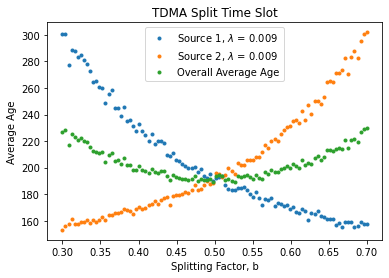

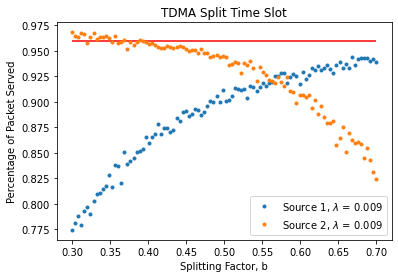

In [52]:
from TDMAQueue import TDMAQueue
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pl

if __name__ == "__main__":
    # Set simulation step size and duration (seconds)
    tFinal = 1800
    dt = 0.1

    # Set number of sources
    numSources = 2

    # Set average service rate (packet/second)
    mu = 1/30
    T = 5/mu

    # Set splitting factor b
    bLength = 100
    splitFactor = np.linspace(0.3, 0.7, bLength)

    # Set arrival rates for each source (packet/second)
    arrivalRate = [0, 0]
    # Need to make sure that the arrival rate will always be less than the service rate
    arrivalRate[0] = mu * min(splitFactor) * 0.9
    arrivalRate[1] = mu * (1 - max(splitFactor)) * 0.9

    numSimulations = 500
    avgAge = np.zeros((bLength, numSources,))
    avgJobComp = np.zeros((bLength, numSources,))

    start_time = time.time()

    for i in range(bLength):
        b = splitFactor[i]
        slotWidth = [b*T, (1-b)*T]

        for j in range(numSimulations):
            print("[{:d}/{:d}] Simulation {:d} for b={:.2f}".format(
                i, bLength, j, b), end='\r')

            tdma = TDMAQueue(tFinal, dt, slotWidth, arrivalRate, mu)
            avgAge[i] += tdma.getAvgAge()
            avgJobComp[i] += tdma.CompletionPercentage()

        avgAge[i] = avgAge[i] / numSimulations
        avgJobComp[i] = avgJobComp[i] / numSimulations
        # print("b = {:.2f}, avgJobComp = [ {:.2f}, {:.2f} ]".format(
        #     b, avgJobComp[i, 0], avgJobComp[i, 1]), end='\n');

    print("Program took {:.2f}s to run".format(time.time() - start_time))

    diffAge = abs(avgAge[:, 0] - avgAge[:, 1])
    bestB = splitFactor[np.argmin(diffAge)]
    print(
        "b value that minimizes the difference between average age: {:.3f}".format(bestB))

    overallAvgAge = np.sum(avgAge, axis=1) / numSources
    bestB = splitFactor[np.argmin(overallAvgAge)]
    print(
        "b value that minimizes the overall average age: {:.3f}".format(bestB))

    plt.figure(1)
    plt.plot(splitFactor, avgAge[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgAge[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.plot(splitFactor, overallAvgAge, '.', label="Overall Average Age")
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Average Age")
    plt.title("TDMA Split Time Slot")
    plt.show()
    
    filename = 'percentage_done_u1l_%s' % T1
    plt.plot(splitFactor, avgJobComp[:, 0], '.',
             label="Source 1, $\lambda$ = {:.3f}".format(arrivalRate[0]))
    plt.plot(splitFactor, avgJobComp[:, 1], '.',
             label="Source 2, $\lambda$ = {:.3f}".format(arrivalRate[1]))
    plt.hlines(y=0.96, xmin=min(splitFactor), xmax=max(splitFactor), color='r')
    plt.legend()
    plt.xlabel("Splitting Factor, b")
    plt.ylabel("Percentage of Packet Served")
    plt.title("TDMA Split Time Slot")
    plt.show()
